***
# ***Imports***
***

## ***Python Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import seaborn as sns

## ***Dataset***

In [2]:
df = pd.read_csv("/workspaces/Anomoly-detection/insurance.csv")

***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

***Dataset Properties***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [6]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

***Missing Value Check***

In [7]:
print("The number of missing values for each column: \n", df.isnull().sum())

The number of missing values for each column: 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


***Duplicates Check***

In [8]:
print("The number of duplicates in the dataset is: ", df.duplicated().sum())

The number of duplicates in the dataset is:  1


## ***Visualizations***

### ***Univariate Analysis***

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charges', ylabel='Count'>

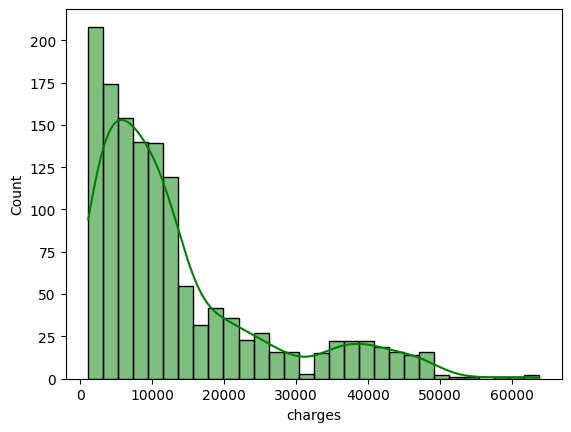

In [9]:
sns.histplot(data=df, x=df["charges"], kde=True, color='g')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

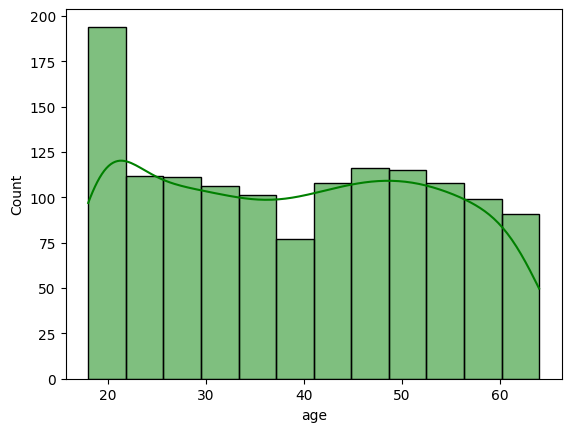

In [10]:
sns.histplot(data=df, x=df["age"], kde=True, color='g')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


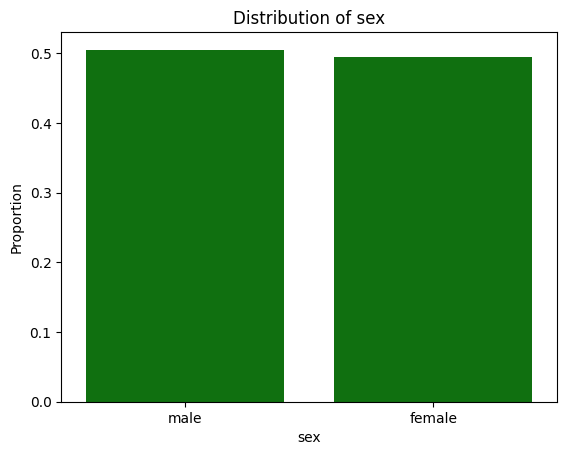

In [11]:
# Distribution of the 'sex' column within our dataset, showing the propotion  for each category in the column
proportions = (df['sex'].value_counts(normalize=True))

# Create a bar plot using the proportions
sns.barplot(x=proportions.index, y=proportions.values, color='g')
plt.title('Distribution of sex')
plt.xlabel('sex')
plt.ylabel('Proportion')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of bmi')

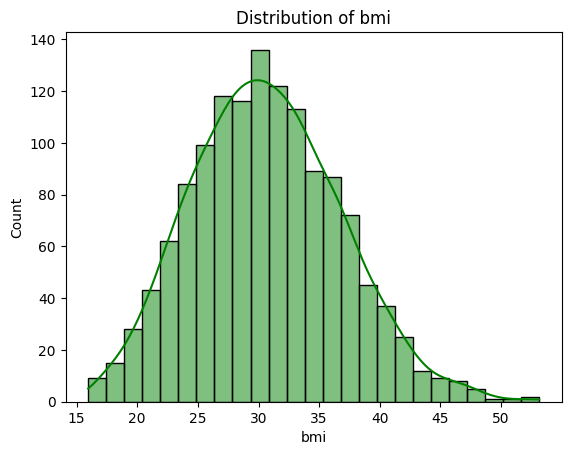

In [12]:
sns.histplot(data=df, x="bmi", kde=True, color="g")
plt.title('Distribution of bmi')


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


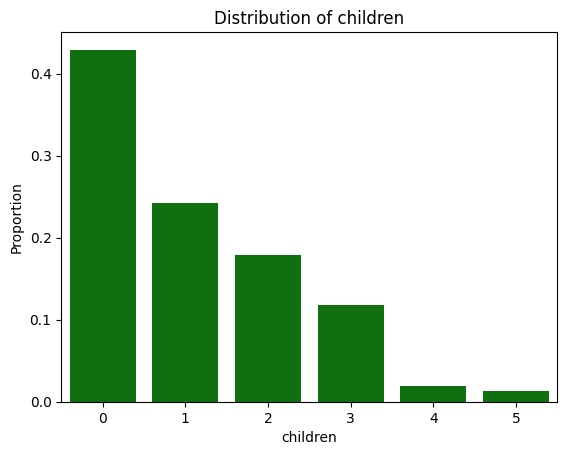

In [13]:
# Distribution of the 'children' column within our dataset, showing the propotion  for each category in the column
proportions = (df['children'].value_counts(normalize=True))

# Create a bar plot using the proportions
sns.barplot(x=proportions.index, y=proportions.values, color='g')
plt.title('Distribution of children')
plt.xlabel('children')
plt.ylabel('Proportion')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


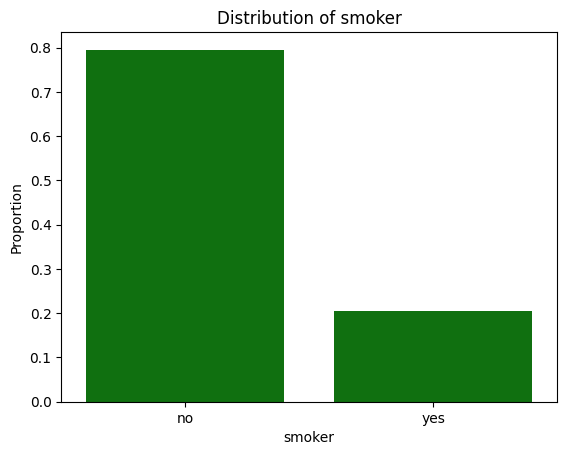

In [14]:
# Distribution of the 'smoker' column within our dataset, showing the propotion  for each category in the column
proportions = (df['smoker'].value_counts(normalize=True))

# Create a bar plot using the proportions
sns.barplot(x=proportions.index, y=proportions.values, color='g')
plt.title('Distribution of smoker')
plt.xlabel('smoker')
plt.ylabel('Proportion')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


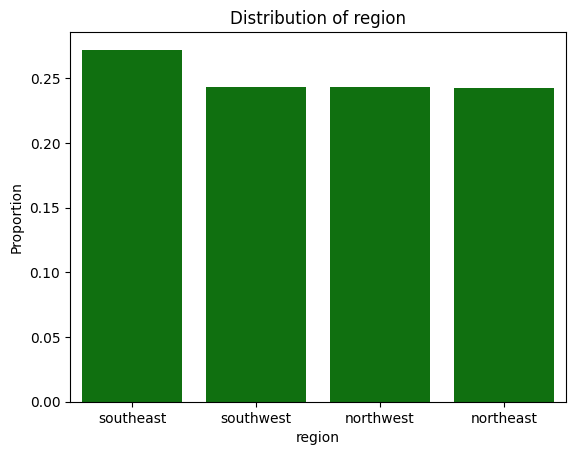

In [15]:
# Distribution of the 'region' column within our dataset, showing the propotion  for each category in the column
proportions = (df['region'].value_counts(normalize=True))

# Create a bar plot using the proportions
sns.barplot(x=proportions.index, y=proportions.values, color='g')
plt.title('Distribution of region')
plt.xlabel('region')
plt.ylabel('Proportion')
plt.show()

### ***Bivariate Analysis***

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='charges'>

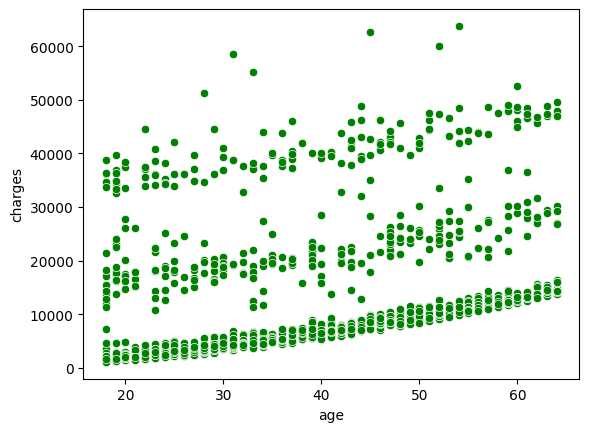

In [16]:
sns.scatterplot(x = df["age"], y = df["charges"], color='g')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age_group', ylabel='charges'>

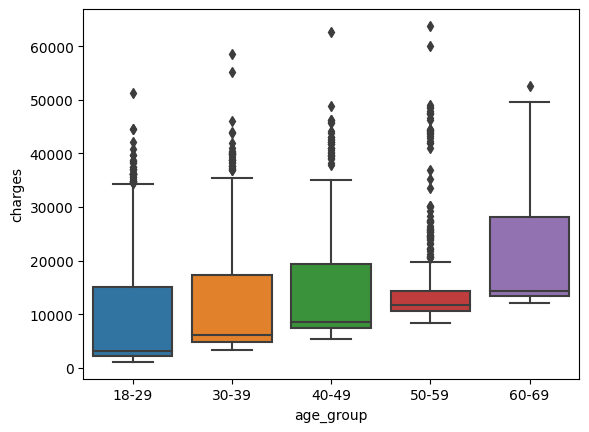

In [17]:
# Define age group bins and labels
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69']

# Create a new column 'age_group' in the DataFrame
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

sns.boxplot(x=df["age_group"], y=df["charges"])

In [18]:
del df['age_group']

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='charges'>

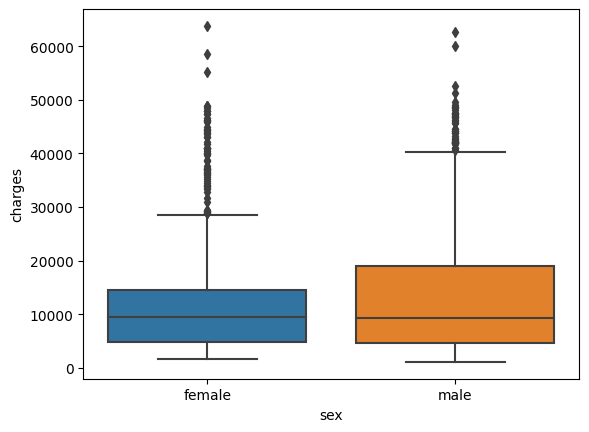

In [19]:
sns.boxplot(x = df["sex"], y = df["charges"])

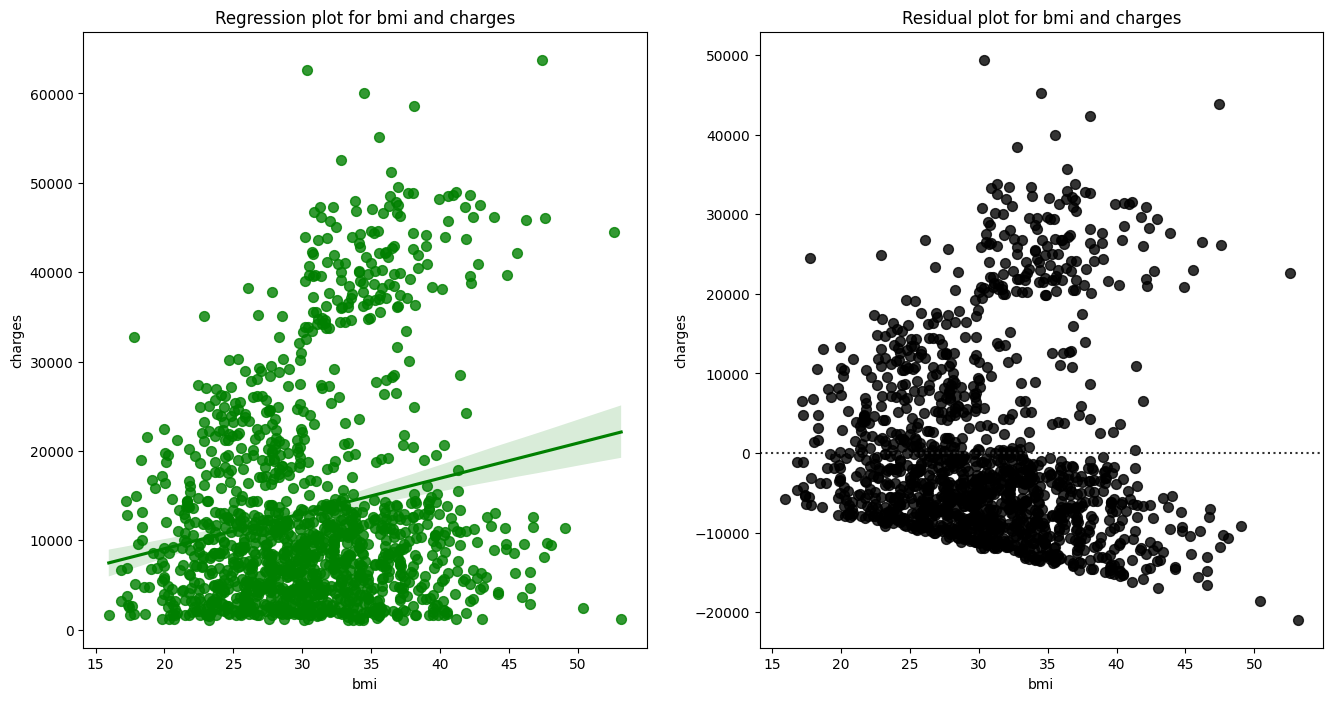

In [20]:
# sns.regplot(data=df, x = 'bmi', y = 'charges', scatter=True, color='g')

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(16,8))


# regression plot 

sns.regplot(x='bmi', y='charges', data=df, scatter=True, scatter_kws={"s": 50}, color='g', ax=axes[0])

axes[0].set_title("Regression plot for bmi and charges")



# residual plot 

sns.residplot(x="bmi", y="charges", data=df, scatter_kws={"s": 50}, color='black', ax=axes[1])

axes[1].set_title("Residual plot for bmi and charges")


#plt.tight_layout()

plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='children', ylabel='charges'>

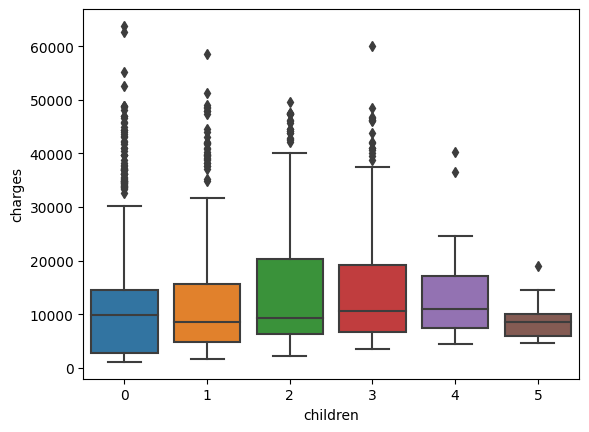

In [21]:
sns.boxplot(x = df["children"], y = df["charges"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='smoker', ylabel='charges'>

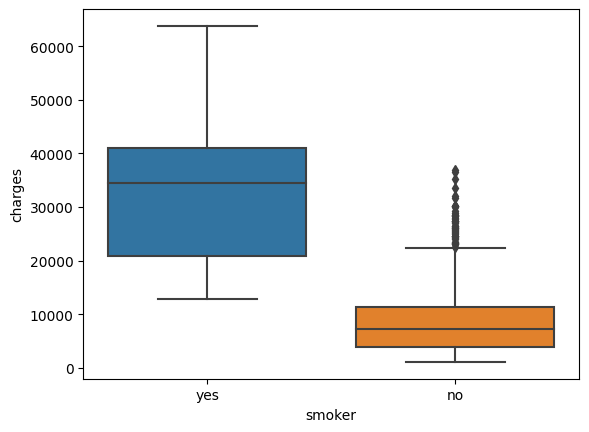

In [22]:
sns.boxplot(x = df["smoker"], y = df["charges"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='region', ylabel='charges'>

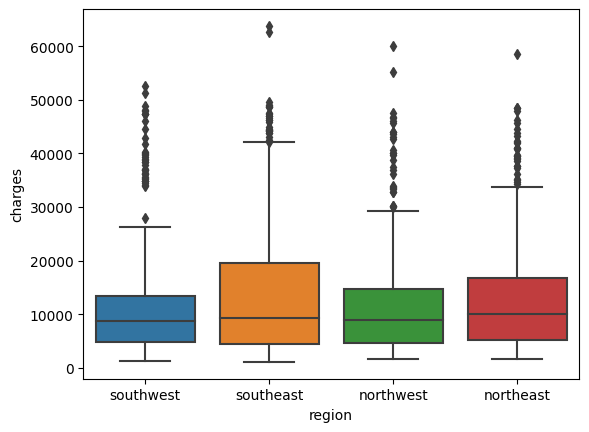

In [23]:
sns.boxplot(x = df["region"], y = df["charges"])

### ***Multivariate Analysis***


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

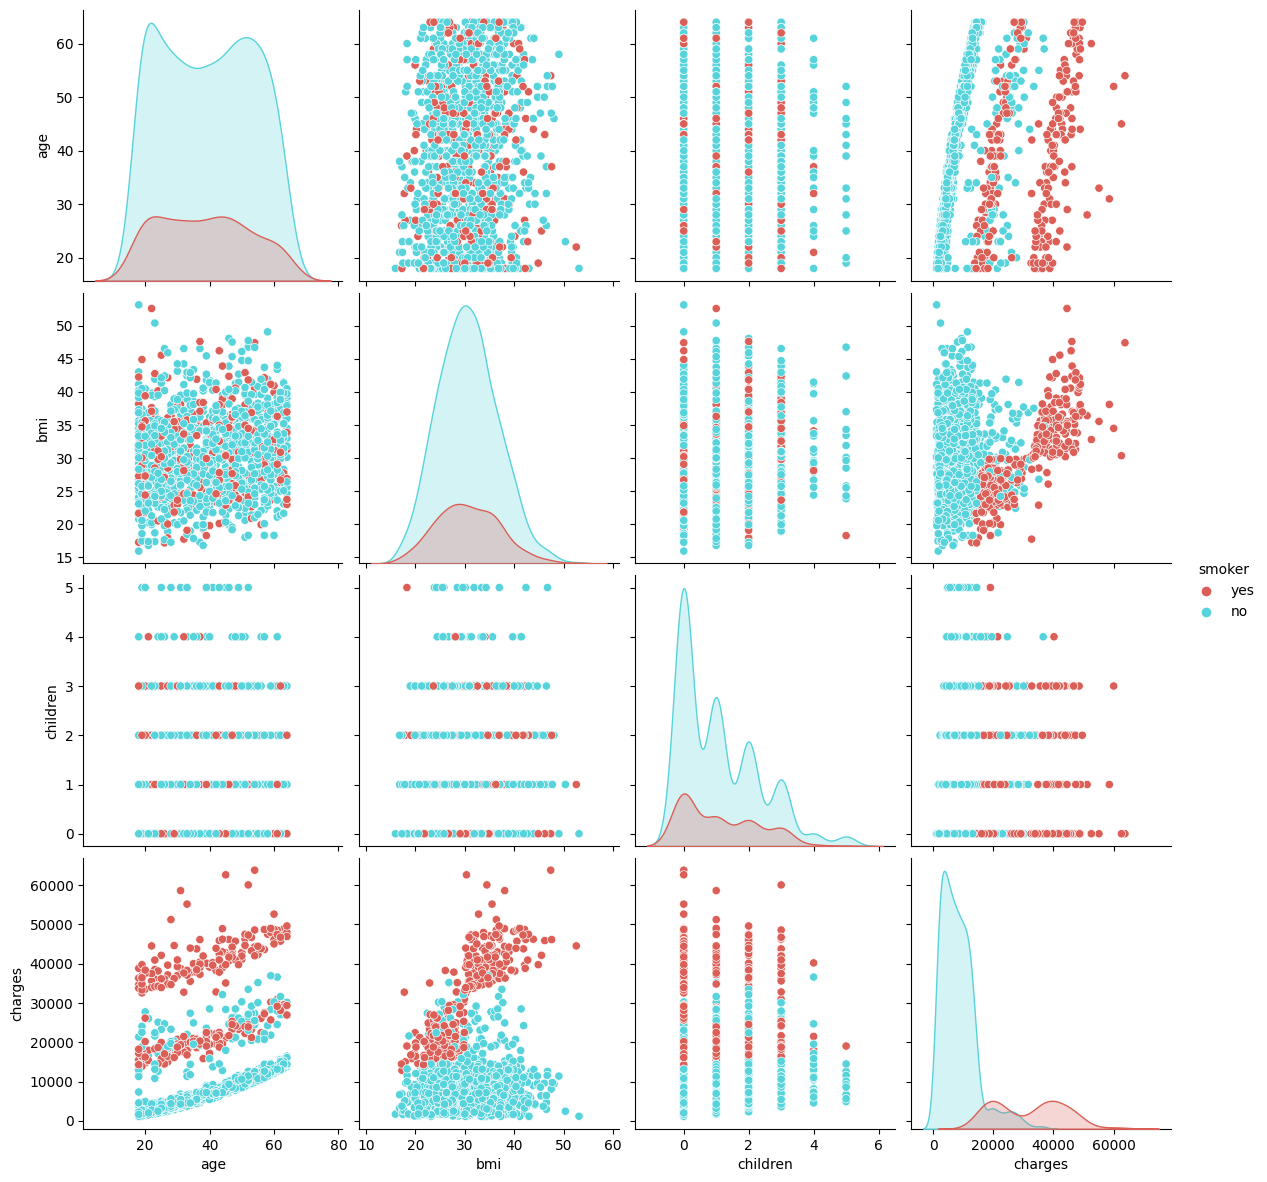

In [24]:
sns.pairplot(data=df, hue='smoker', palette='hls', height=3)

***
# ***Data Preprocessing***
***

***One Hot Encoding Categorical Data***

In [25]:
enc = OneHotEncoder()
enc_data = enc.fit_transform(df[["sex", "smoker", "region"]])
enc_df = pd.DataFrame(enc_data.toarray(), columns=enc.get_feature_names_out(["sex", "smoker", "region"]))


df = pd.concat([enc_df, df], axis=1)
columns_to_drop = ["sex", "smoker", "region"]
df = df.drop(columns_to_drop, axis=1)

In [26]:
df.head()

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0         1.0       0.0        0.0         1.0               0.0   
1         0.0       1.0        1.0         0.0               0.0   
2         0.0       1.0        1.0         0.0               0.0   
3         0.0       1.0        1.0         0.0               0.0   
4         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  age     bmi  \
0               0.0               0.0               1.0   19  27.900   
1               0.0               1.0               0.0   18  33.770   
2               0.0               1.0               0.0   28  33.000   
3               1.0               0.0               0.0   33  22.705   
4               1.0               0.0               0.0   32  28.880   

   children      charges  
0         0  16884.92400  
1         1   1725.55230  
2         3   4449.46200  
3         0  21984.47061  
4         0   3866.85520

***Dimensionality Reduction***

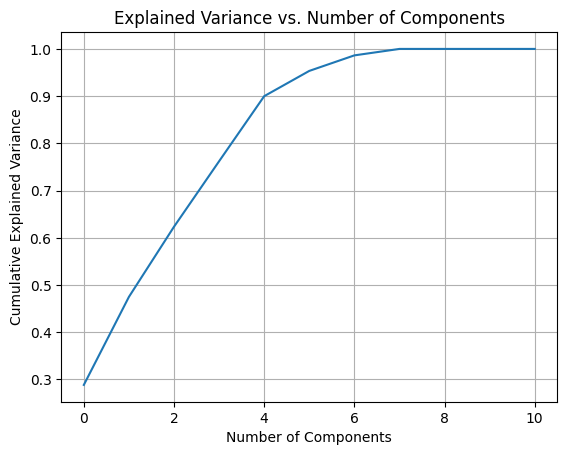

In [31]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :11]

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=11)  # Limit to the first 10 components for visualization
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [32]:
components = pca.components_
components_df = pd.DataFrame(components, columns=X.columns)
components_df.head()

sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0   -0.695627  0.695627  -0.122539    0.122539         -0.003793   
1    0.126041 -0.126041  -0.662049    0.662049         -0.013865   
2   -0.007014  0.007014   0.198183   -0.198183         -0.379239   
3    0.004841 -0.004841  -0.009637    0.009637         -0.001010   
4   -0.005031  0.005031   0.084452   -0.084452          0.777210   

   region_northwest  region_southeast  region_southwest           age  \
0         -0.019984          0.035471         -0.011695 -1.251986e-02   
1         -0.116992          0.250585         -0.119728 -1.600135e-02   
2         -0.245187          0.818810         -0.194384 -2.814659e-07   
3         -0.688985         -0.033341          0.723336  7.685677e-03   
4         -0.446345          0.086651         -0.417516 -1.925998e-04   

        bmi  children  
0  0.012983  0.006413  
1  0.018421 -0.002725  
2  0.095034 -0.011960  
3  0.026076 -0.000064  
4 -0.006527 -0.023126